# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# **Data Cleaning and Preprocessing**

In [ ]:
df_train = pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [ ]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [ ]:
df_test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [ ]:
X_train=df_train.drop(columns=['y'])
y_train=df_train['y']

In [ ]:
print("train - NA values")
print(X_train.isna().sum())
print("test - NA values")
print(df_test.isna().sum())

train - NA values
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64
test - NA values
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [ ]:
print(len(df_test))

250000


In [ ]:
print((X_train['poutcome']=="unknown").sum())
print((df_test['poutcome']=='unknown').sum())

672450
224115


In [ ]:
X_train.drop(columns=['poutcome','id','duration'],inplace=True)
df_test.drop(columns=["poutcome",'id','duration'],inplace=True)

Checking for outliers

In [ ]:
#using IQR

def inter_quartile_outlier(df):
  summary={}
  numeric_cols=df.select_dtypes(include=['int64','float64']).columns

  for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=((df[col]<lower)|(df[col]>upper)).sum()
    summary[col]={
        "Total_Rows": len(df),
        "Outliers":outliers,
        "% Outliers": round((outliers/len(df))*100,2)
    }
  return pd.DataFrame(summary).T.sort_values("% Outliers",ascending=False)

outliers_table=inter_quartile_outlier(X_train)
print(outliers_table)

          Total_Rows  Outliers  % Outliers
pdays       750000.0   77566.0       10.34
previous    750000.0   77569.0       10.34
balance     750000.0   57745.0        7.70
campaign    750000.0   40686.0        5.42
age         750000.0    4903.0        0.65
day         750000.0       0.0        0.00


Log transform - balance and campaign

In [ ]:
X_train['balance_log']=np.log1p(X_train['balance'].clip(lower=0))
X_train['campaign_log']=np.log1p(X_train['campaign'].clip(lower=0))

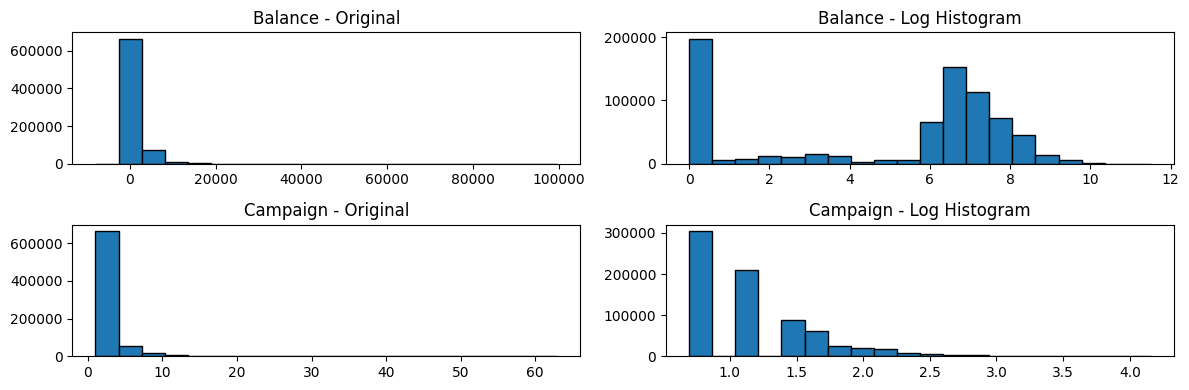

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,4))

axes[0,0].hist(X_train['balance'],bins=20,edgecolor='black')
axes[0,0].set_title("Balance - Original")

axes[0,1].hist(X_train['balance_log'],bins=20,edgecolor='black')
axes[0,1].set_title("Balance - Log Histogram")

axes[1,0].hist(X_train['campaign'],bins=20,edgecolor="black")
axes[1,0].set_title("Campaign - Original")

axes[1,1].hist(X_train['campaign_log'],bins=20,edgecolor="black")
axes[1,1].set_title("Campaign - Log Histogram")

plt.tight_layout()
plt.show()

In [ ]:
print("Skewness before log - balance", X_train["balance"].skew())
print("Skewness after log - balance", X_train["balance_log"].skew())

print("Skewness before log - campaign",X_train["campaign"].skew())
print("Skewness after log - campaign",X_train["campaign_log"].skew())

Skewness before log - balance 12.304122777345025
Skewness after log - balance -0.6049938567336219
Skewness before log - campaign 4.810436696187615
Skewness after log - campaign 1.323180629674468


In [ ]:
X_train['pdays_missing']=(X_train['pdays']==-1).astype(int)
X_train['previous_log']=np.log1p(X_train['previous'])

In [ ]:
print("Skewness before log - previous",X_train['previous'].skew())
print("Skewness after log - previous",X_train['previous_log'].skew())

Skewness before log - previous 13.749885331453086
Skewness after log - previous 3.6199140869265896


In [ ]:
X_train.drop(columns=["previous","pdays","campaign","balance"],inplace=True)

Categorical features

In [ ]:
X_train['job'].value_counts()

,count
job,
management,175541
blue-collar,170498
technician,138107
admin.,81492
services,64209
retired,35185
self-employed,19020
entrepreneur,17718
unemployed,17634


In [ ]:
X_train['education'].value_counts()

,count
education,
secondary,401683
tertiary,227508
primary,99510
unknown,21299


In [ ]:
print(X_train['default'].value_counts())
print(X_train['housing'].value_counts())
print(X_train['loan'].value_counts())

default
no     737151
yes     12849
Name: count, dtype: int64
housing
yes    411288
no     338712
Name: count, dtype: int64
loan
no     645023
yes    104977
Name: count, dtype: int64


In [ ]:
yn_map={"yes":1,"no":0}
X_train['default']=X_train['default'].map(yn_map)
X_train['housing']=X_train['housing'].map(yn_map)
X_train['loan']=X_train['loan'].map(yn_map)

In [ ]:
month_map={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,
           "jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
X_train['month_num']=X_train["month"].map(month_map)

X_train['day_of_year']=(X_train['month_num']-1)*30+X_train['day']

X_train['day_sin']=np.sin(2*np.pi*X_train["day_of_year"]/365)
X_train['day_cos']=np.cos(2*np.pi*X_train['day_of_year']/365)

X_train.drop(columns=["month","month_num","day","day_of_year"],inplace=True)

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,balance_log,campaign_log,pdays_missing,previous_log,day_sin,day_cos
0,42,technician,married,secondary,0,0,0,cellular,2.079442,1.386294,1,0.0,-0.785650,-0.618671
1,38,blue-collar,married,secondary,0,0,0,unknown,6.244167,0.693147,1,0.0,0.247022,-0.969010
2,36,blue-collar,married,secondary,0,1,0,unknown,6.401917,1.098612,1,0.0,0.741222,-0.671260
3,27,student,single,secondary,0,1,0,unknown,3.555348,1.098612,1,0.0,0.559589,-0.828770
4,26,technician,married,secondary,0,1,0,cellular,6.791221,0.693147,1,0.0,0.538005,0.842942


In [ ]:
y_train.head()

,y
0,0
1,0
2,0
3,0
4,1


In [ ]:
cat_columns=['job','marital','education','contact']

ohe=OneHotEncoder(drop=None,sparse_output=False)

encoded=ohe.fit_transform(X_train[cat_columns])
encoded_cols=ohe.get_feature_names_out(cat_columns)

encoded_df=pd.DataFrame(encoded,columns=encoded_cols,index=X_train.index)

df_cleaned=X_train.drop(columns=cat_columns).join(encoded_df)

In [ ]:
df_cleaned.head()

,age,default,housing,loan,balance_log,campaign_log,pdays_missing,previous_log,day_sin,day_cos,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,42,0,0,0,2.079442,1.386294,1,0.0,-0.785650,-0.618671,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38,0,0,0,6.244167,0.693147,1,0.0,0.247022,-0.969010,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,36,0,1,0,6.401917,1.098612,1,0.0,0.741222,-0.671260,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,27,0,1,0,3.555348,1.098612,1,0.0,0.559589,-0.828770,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,26,0,1,0,6.791221,0.693147,1,0.0,0.538005,0.842942,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_final=df_cleaned.join(y_train)

In [ ]:
df_final.to_csv("Bank_cleaned.csv")